<a href="https://colab.research.google.com/github/AthirahFauzi02/Stochastic_Gradient_Descent_and_Batch_Gradient_Descent/blob/main/ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#shuffle data set
def shuffle(x):
  return np.arange(len(x))  
  
#error function
def error(y_true, y_predict):
    return np.sum((y_predict - y_true)**2)

#prediction function
def prediction_y(X, w, b):
    sum_func = np.dot(X, w) + b
    return 1 / (1 + np.exp(-sum_func))

#substract y_predict and y_true
def derivative (y_predict, y):
    return y_predict - y

In [ ]:
def SGD(weights, bias, X, Y):  
  errorsList = []
  accuracyList = []
  weightsList = []
  weight1 =[]
  weight2 = []
  predictList = []

  for epoch in range(iter_num):
    sample = np.random.randint(0, X.shape[0] - 1)
    x_sample = X[sample]
    y_true = Y[sample]

    #compute prediction
    y_predict = prediction_y(x_sample, weights, bias)

    #Compute gradient of error with respect to each weights (de/dw)
    p = 2*(derivative(y_predict, y_true))
    q = 1-y_predict
    de_dw = p*y_predict*q*x_sample
    de_db = p*y_predict*q

    #Update each weights and bias
    weights = weights - (learning_rate * de_dw)
    bias = bias - (learning_rate * de_db)

    #compute error
    prediction = prediction_y(X, weights, bias)    
    errors = error(Y, prediction)
    errorsList.append(errors)
    predictList.append(prediction)

    #compute accuracy
    num_correct = np.sum((prediction >= 0.5) == Y)
    accuracy = (float(num_correct) / len(X))*100
    accuracyList.append(accuracy)

    weightsList.append(weights)
    weight1.append(weights[0])
    weight2.append(weights[1])
  
  # Plot the loss and accuracy over epochs
  plt.plot(errorsList)
  plt.title("Error")
  plt.xlabel("Iteration")
  plt.ylabel("Sum sqrt of error")
  plt.show()

  plt.plot(accuracyList)
  plt.title("Accuracy")
  plt.xlabel("Iteration")
  plt.ylabel("Accuracy %")
  plt.show()

  plt.plot(weight1)
  plt.plot(weight2)
  plt.title("Weights")
  plt.xlabel("Iteration")
  plt.ylabel("Weights")
  plt.show()

  plt.scatter(X[:, 0], X[:, 1], c=Y)

  x1 = np.linspace(-6, 8, 600)
  x2 = -(weights[0] * x1 + bias) / weights[1]
  plt.plot(x1, x2)
  plt.title("Decision Line on SGD")
  plt.xlabel("Mary's rating")
  plt.ylabel("John's rating")
  plt.show()

  yes_pred = prediction[Y == 1]
  no_pred = prediction[Y == 0]

  yes_acc = np.mean(yes_pred >= 0.5)
  no_acc = np.mean(no_pred < 0.5)

  print("SGD")
  print(f"Yes accuracy: {yes_acc:.2%}")
  print(f"No accuracy: {no_acc:.2%}")

  # Creating figures for the plot  
  fig = plt.figure(figsize = (10, 7))  
  ax = plt.axes(projection ="3d")  
    
  # Creating a plot using the random datasets   
  ax.scatter3D(X[:,0], X[:,1], label = 'Yes', c=Y)
  plt.title("3D scatter plot")


  #create decision boundary
  tmp = np.linspace(-6, 10, 30)
  x,y = np.meshgrid(tmp, tmp)
  z = weights[0] * x + weights[1] * y + bias
                  
  ax.plot_wireframe(x, y, z, alpha=0.5, color='g')
    
  # display the  plot  
  plt.show()  

In [ ]:
def BGD(weights, bias, X, Y):
  errorsListBGD = []
  accuracyListBGD = []
  predictListBGD = []
  weightsListBGD = []
  weight1BGD = []
  weight2BGD = []

  for epoch in range (iter_num):   

      #compute prediction
      y_predictBGD = prediction_y(X, weights, bias)     
      predictListBGD.append(y_predictBGD)  

      #Compute gradient of error with respect to each weights (de/dw)
      pBGD = 2*(derivative(y_predictBGD, Y))
      qBGD = 1-y_predictBGD
      de_dwBGD = pBGD*y_predictBGD*qBGD*X.T
      de_dbBGD = pBGD*y_predictBGD*qBGD

      grad1 = np.mean(de_dwBGD)
      grad2 = np.mean(de_dbBGD)

      #Update each weights and bias
      weights = weights - learning_rate * grad1
      bias = bias - (learning_rate * grad2)

      #compute error        
      errorsBGD = error(Y, y_predictBGD)
      errorsListBGD.append(errorsBGD)      

      #campute accuracy
      num_correctBGD = (y_predictBGD >= 0.5) == Y
      num_correctBGD1 = sum(num_correctBGD == Y)
      accuracyBGD = (num_correctBGD1 / len(Y))*100    
      accuracyListBGD.append(accuracyBGD)

      weightsListBGD.append(weights)
      weight1BGD.append(weights[0])
      weight2BGD.append(weights[1])

  plt.plot(errorsListBGD)
  plt.title("Error")
  plt.xlabel("Iteration")
  plt.ylabel("Sum sqrt of error")
  plt.show()

  plt.plot(accuracyListBGD)
  plt.title("Accuracy")
  plt.xlabel("Iteration")
  plt.ylabel("Accuracy %")
  plt.show()

  plt.plot(weight1BGD)
  plt.plot(weight2BGD)
  plt.title("Weights")
  plt.xlabel("Iteration")
  plt.ylabel("Weights")
  plt.show()

  plt.scatter(X[:, 0], X[:, 1], c=Y)

  x1 = np.linspace(-6, 8, 600)
  x2 = -(weights[0] * x1 + bias) / weights[1]
  plt.plot(x1, x2)
  plt.title("Decision Line on SGD")
  plt.xlabel("Mary's rating")
  plt.ylabel("John's rating")
  plt.show()

  yes_pred = y_predictBGD[Y == 1]
  no_pred = y_predictBGD[Y == 0]

  yes_acc = np.mean(yes_pred >= 0.5)
  no_acc = np.mean(no_pred < 0.5)

  print("BGD")
  print(f"Yes accuracy: {yes_acc:.2%}")
  print(f"No accuracy: {no_acc:.2%}")

  # Creating figures for the plot  
  fig = plt.figure(figsize = (10, 7))  
  ax = plt.axes(projection ="3d")  
    
  # Creating a plot using the random datasets   
  ax.scatter3D(X[:,0], X[:,1], label = 'Yes', c=Y)
  plt.title("3D scatter plot")


  #create decision boundary
  tmp = np.linspace(-6, 10, 30)
  x,y = np.meshgrid(tmp, tmp)
  z = weights[0] * x + weights[1] * y + bias
                  
  ax.plot_wireframe(x, y, z, alpha=0.5, color='g')
    
  # display the  plot  
  plt.show()  

In [ ]:
def dataset(x, y):
  plt.scatter(x[:,0], x[:,1], label = 'Yes')
  plt.scatter(y[:,0], y[:,1], label = 'No')

  plt.xlabel("Mary's rating")
  plt.ylabel("John's rating")
  plt.legend()
  plt.show()

  #create labels for sample
  yes_label = np.ones(num_sample_div)
  no_label = np.zeros(num_sample_div)

  #concatenate the sample and label
  X = np.concatenate([x, y], axis = 0)
  Y = np.concatenate([yes_label, no_label], axis = 0)

  #shuffle dataset
  shuf = shuffle(X)
  np.random.shuffle(shuf)

  X = X[shuf]
  Y = Y[shuf]

  print("   ")
  print("---------------------------TRAIN DATASET-----------------------------")
  print("--------------------STOCHASTIC GRADIENT DESCENT----------------------")
  SGD(weights, bias, X, Y)

  print("---------------------------------------------------------------------")
  print("---------------------------------------------------------------------")
  print("-----------------------BATCH GRADIENT DESCENT------------------------")
  BGD(weights, bias, X, Y)


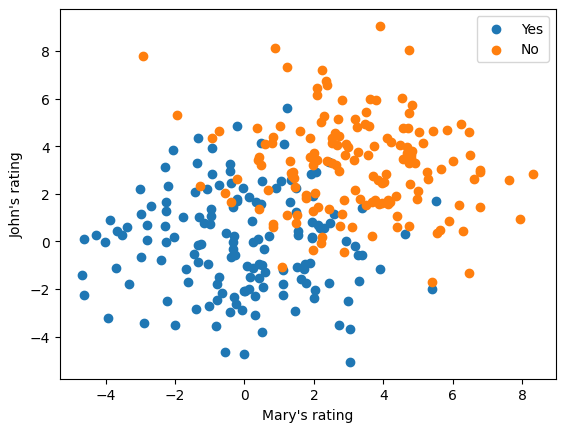

   
---------------------------TRAIN DATASET-----------------------------
--------------------STOCHASTIC GRADIENT DESCENT----------------------


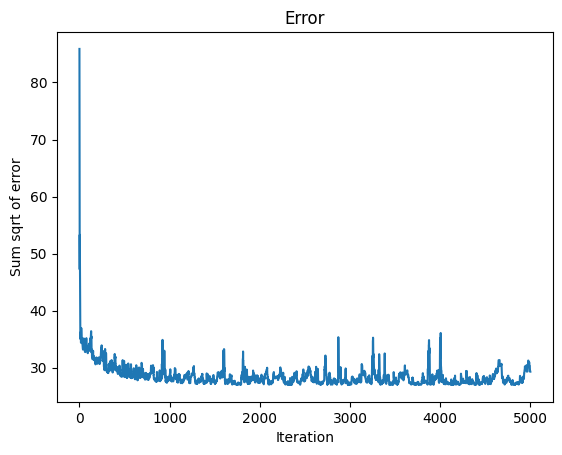

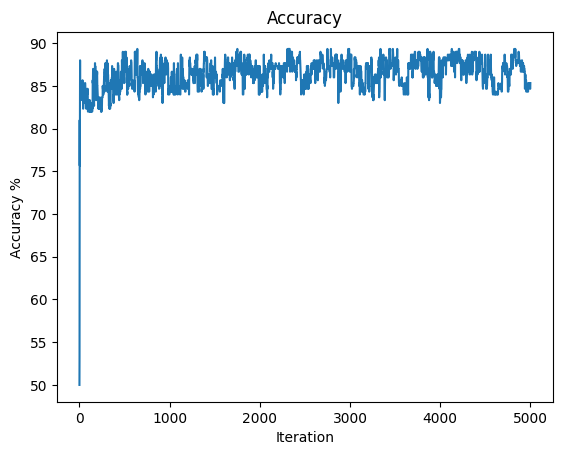

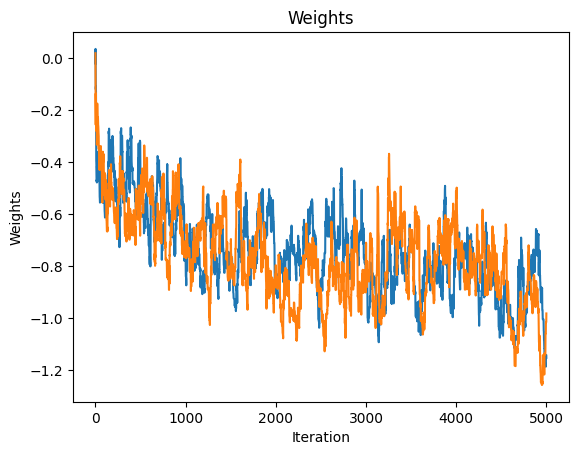

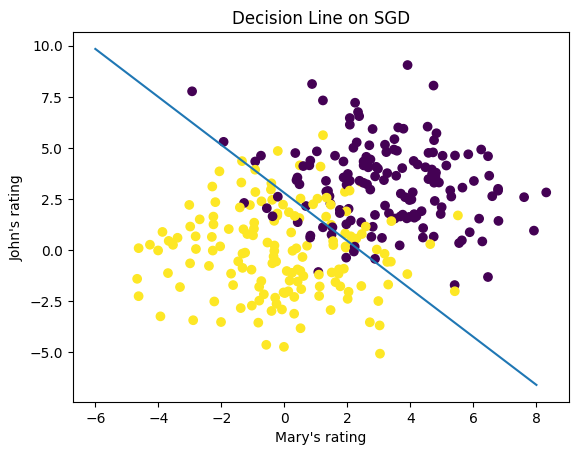

SGD
Yes accuracy: 79.33%
No accuracy: 91.33%


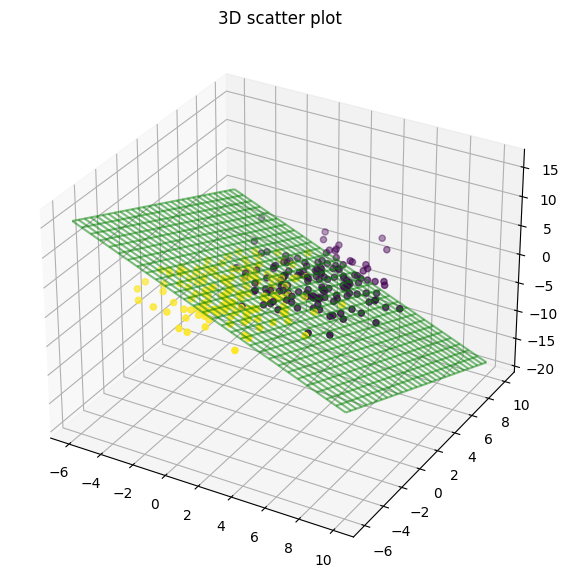

---------------------------------------------------------------------
---------------------------------------------------------------------
-----------------------BATCH GRADIENT DESCENT------------------------


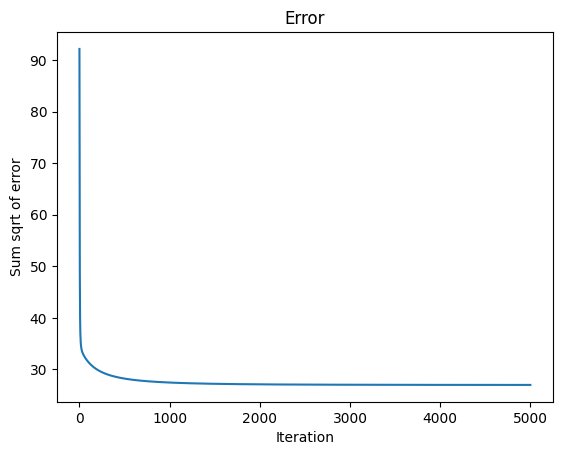

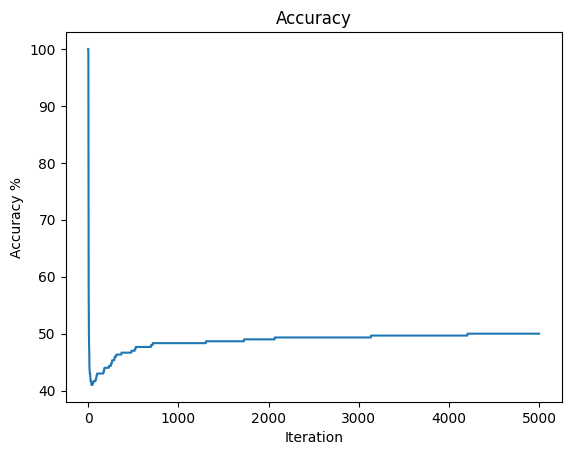

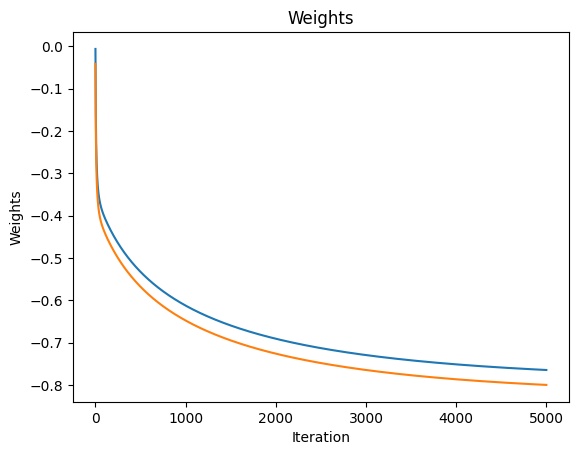

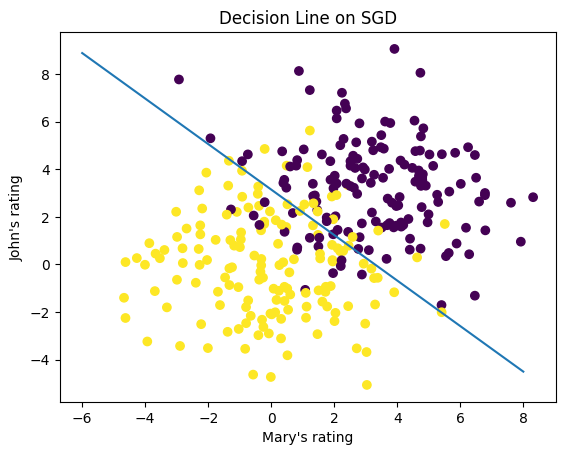

BGD
Yes accuracy: 89.33%
No accuracy: 89.33%


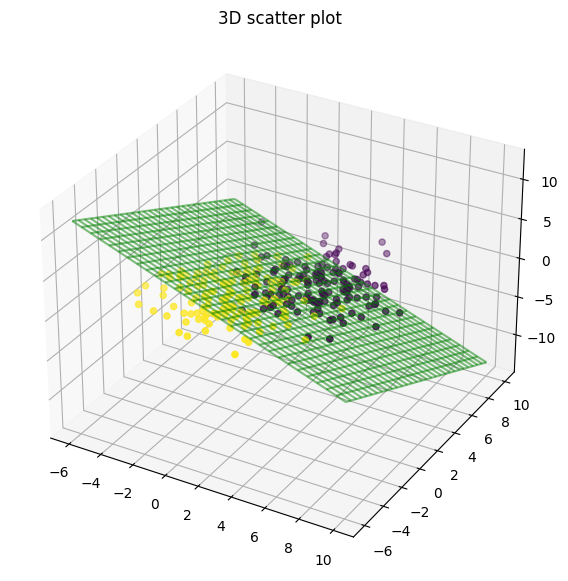

In [ ]:
#for reproducibility
seed = 40
np.random.seed(seed)

num_sample = 300
num_sample_div = int(num_sample/2)

#Set learning rate and iteration
learning_rate = 0.1
iter_num = 5000

#initialize weight and bias
weights = np.random.random(2)*0.1
bias = np.random.rand()

###Training data set####
#random dataset for yes and no
input_yes = np.random.normal(0, 2, (num_sample_div,2))
input_no = np.random.normal(3, 2, (num_sample_div,2))

dataset(input_yes, input_no)


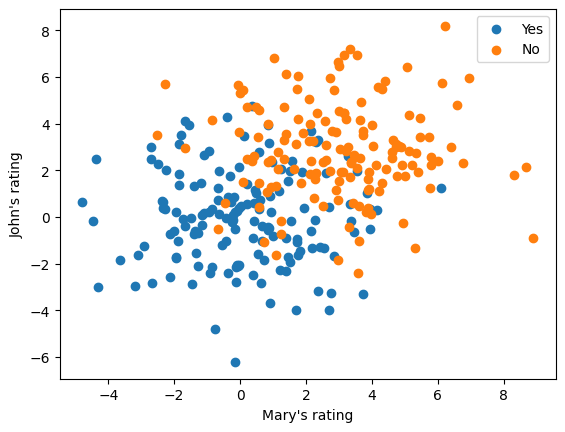

   
---------------------------TRAIN DATASET-----------------------------
--------------------STOCHASTIC GRADIENT DESCENT----------------------


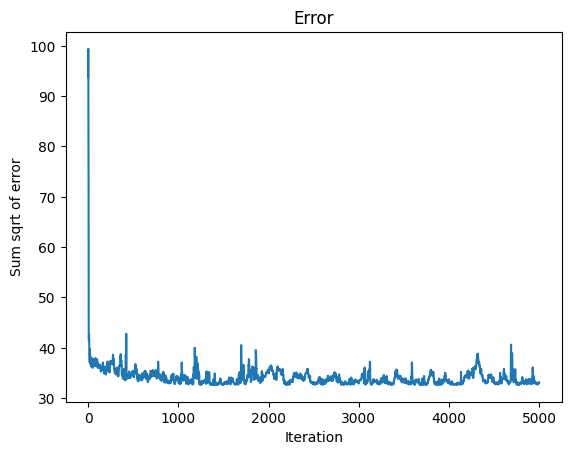

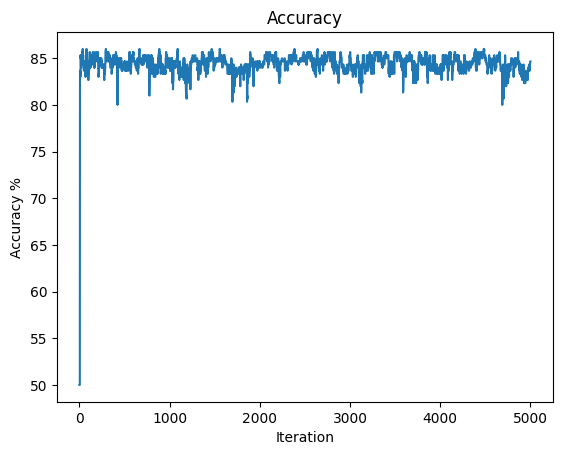

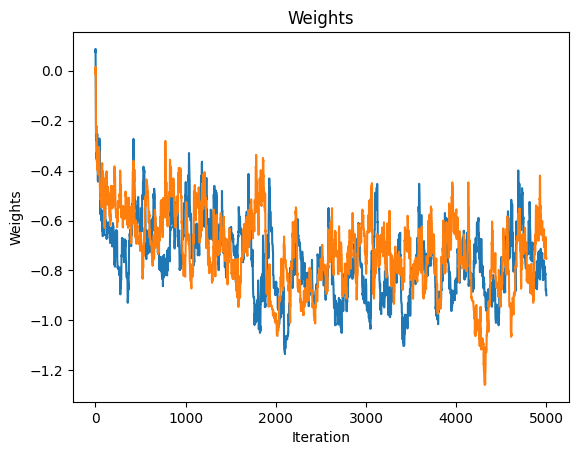

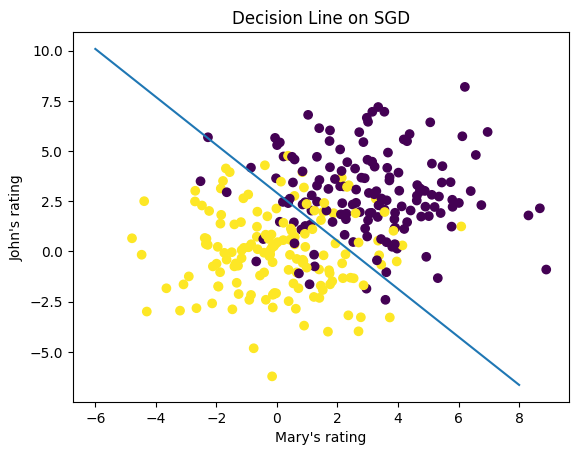

SGD
Yes accuracy: 82.00%
No accuracy: 87.33%


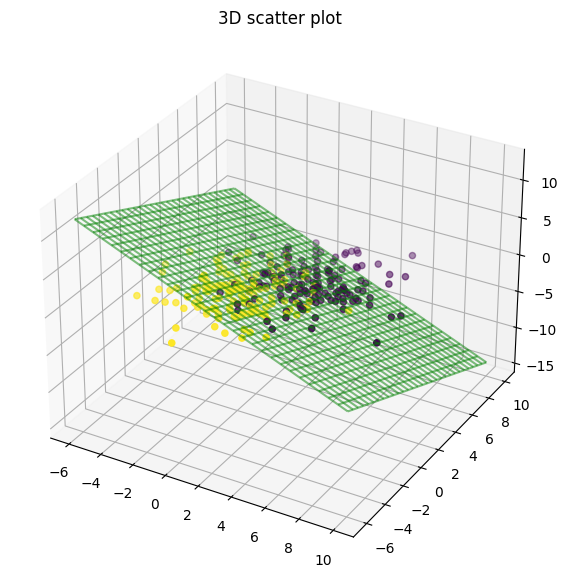

---------------------------------------------------------------------
---------------------------------------------------------------------
-----------------------BATCH GRADIENT DESCENT------------------------


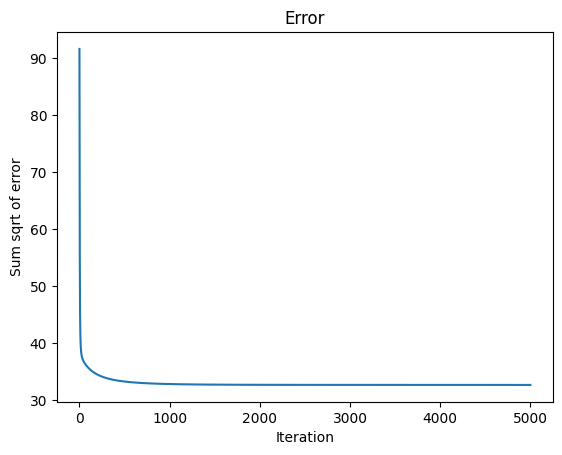

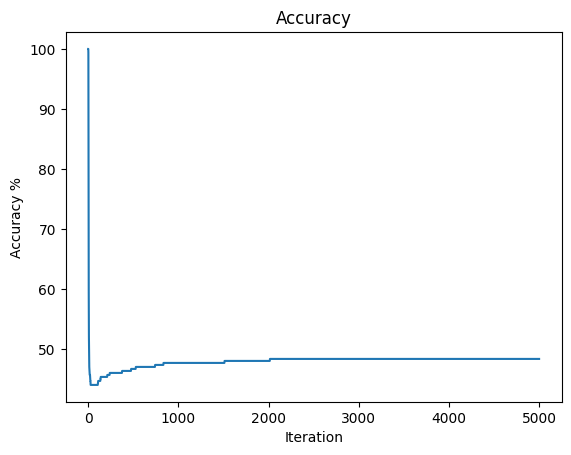

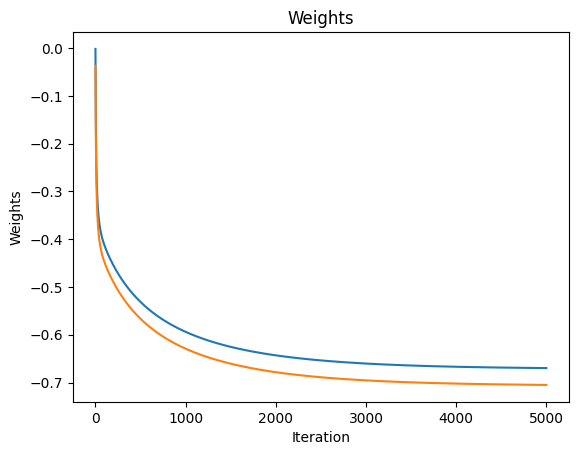

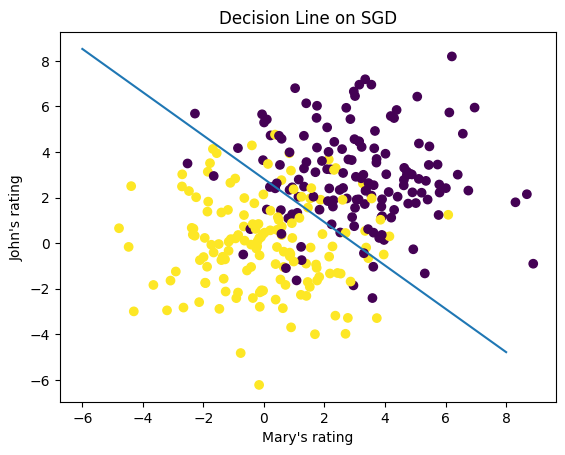

BGD
Yes accuracy: 82.67%
No accuracy: 86.00%


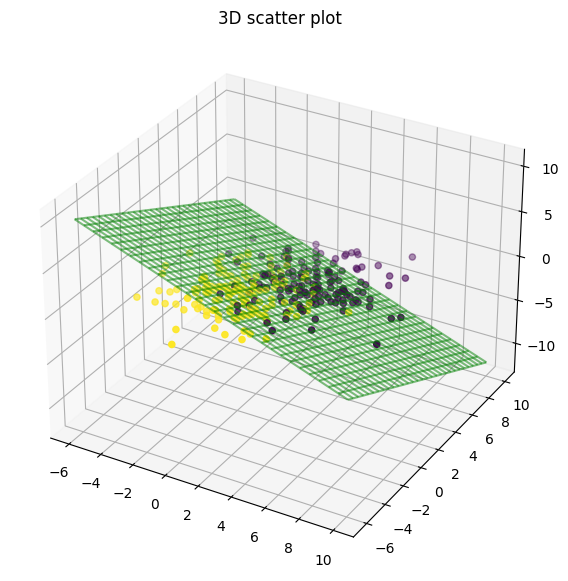

In [ ]:
###Testing data set####
input_yesT = np.random.normal(0, 2, size = (num_sample_div,2))
input_noT = np.random.normal(3, 2, size = (num_sample_div,2))

dataset(input_yesT, input_noT)